### Run the following code to import any necessary libraries and packages needed to run the rest of the script.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os as os

### Run the following chunk of code to generate a hexplot from given regions sizes and eccentricities.

The user will need to adjust the base_Directory variable to account for their directory structure. Pay careful attention to the directory structure of the rest of the script.

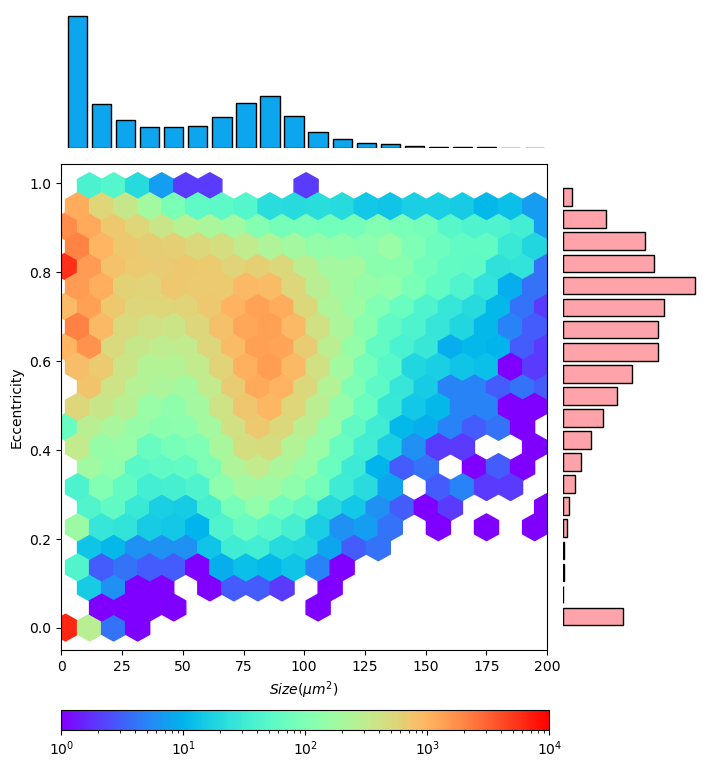

In [3]:
base_Directory = ""

blob_Sizes = np.load(base_Directory + "Analysis/Extracted_Morphological_Features/Region_Sizes.npy")
blob_Eccentricities = np.load(base_Directory + "Analysis/Extracted_Morphological_Features/Region_Eccentricities.npy")

blob_Sizes = [size*0.4225 for size in blob_Sizes]

grids = 20
cutoff = 200
data = pd.DataFrame(list(zip(blob_Sizes,blob_Eccentricities)), columns=['Size','Eccentricity'])
data = data.sort_values(by=['Size'])
data = data[data["Size"] < cutoff]


probability_Weights_Size = np.ones_like(data["Size"]) / len(data["Size"])
probability_Weights_Eccentricity = np.ones_like(data["Eccentricity"]) / len(data["Eccentricity"])


number_Of_Bins_Size = 20
number_Of_Bins_Eccentricity = 20
size_Spacing = (np.max(data["Size"]) - np.min(data["Size"]))/(number_Of_Bins_Size)
eccentricity_Spacing = (np.max(data["Eccentricity"]) - np.min(data["Eccentricity"]))/(number_Of_Bins_Eccentricity)
size_Bins = np.arange(np.min(data["Size"]),np.max(data["Size"]) + size_Spacing,size_Spacing)
eccentricity_Bins = np.arange(np.min(data["Eccentricity"]),np.max(data["Eccentricity"]) + eccentricity_Spacing,eccentricity_Spacing)


fig = plt.figure(figsize=(8, 8))

gs = fig.add_gridspec(2, 2,  width_ratios=(7, 2), height_ratios=(2, 7),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)

ax = fig.add_subplot(gs[1, 0])
ax.set_xlim([0, cutoff])
ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)
ax.set_xlabel(r"$Size ({\mu m}^{2})$")
ax.set_ylabel("Eccentricity")

ax_histx.tick_params(axis="x", labelbottom=False)
ax_histy.tick_params(axis="y", labelleft=False)


hb = ax.hexbin(data["Size"],data["Eccentricity"],  cmap='rainbow', bins = "log", gridsize = grids, mincnt = 1, vmin = 1, vmax = 10**4)

N, bins, patches = ax_histy.hist(data["Eccentricity"],facecolor = '#fea3aa', edgecolor = "black", bins = eccentricity_Bins, weights = probability_Weights_Eccentricity, orientation = "horizontal", rwidth = 0.8)





N, bins, patches = ax_histx.hist(data["Size"], edgecolor = "black", bins = size_Bins, facecolor = "#0EA5EF", weights = probability_Weights_Size, rwidth = 0.8)

for direction in ["top", "bottom", "left", "right"]:
    ax_histx.spines[direction].set_visible(False)
    ax_histy.spines[direction].set_visible(False)
ax_histx.tick_params(
    axis= "x",          
    which='both',      
    bottom=False,     
    top=False,         
    labelbottom=False) 
ax_histx.tick_params(
    axis= "y",          
    which='both',      
    left=False,      
    right=False,         
    labelleft=False) 
ax_histy.tick_params(
    axis= "x",          
    which='both',      
    bottom=False,      
    top=False,         
    labelbottom=False)
ax_histy.tick_params(
    axis= "y",          
    which='both',      
    left=False,      
    right=False,         
    labelleft=False) 

cax = fig.add_axes([0.1, 0, 0.61, 0.025])
cb = fig.colorbar(hb, orientation='horizontal', cax=cax, ticks = [1,10,100,1000,10000])

plt.savefig(base_Directory + "Analysis/Outputs/Hexplot.png")
plt.savefig(base_Directory + "Analysis/Outputs/Hexplot.svg")

plt.show()